## 17. Scenario
You are a data analyst working for a marketing research company. Your team has collected a large 
dataset containing customer feedback from various social media platforms. The dataset consists of 
thousands of text entries, and your task is to develop a Python program to analyze the frequency 
distribution of words in this dataset.

Your program should be able to:
- Load the dataset from a CSV file (data.csv) containing a single column named "feedback".
- Preprocess the text data by removing punctuation, converting all text to lowercase, and 
  eliminating stop words (e.g., "the", "and", "is").
- Calculate the frequency distribution of words in the preprocessed dataset.
- Display the top N most frequent words and their frequencies, where N is user input.
- Plot a bar graph to visualize the top N most frequent words and their frequencies.

## Question
Create a Python program that fulfills these requirements and helps your team gain insights 
from the customer feedback data.


In [2]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 438.4 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 438.4 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 466.3 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 466.3 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 466.3 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 440.8 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 440.8 kB/s eta 0:00:02
   ---------------------------------- --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import nltk

# Download stopwords (only first time)
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv("data.csv") 
df

,feedback
0,"I love this product, it works really well!"
1,The delivery was slow but the product quality ...
2,"Absolutely amazing experience, I will buy again."
3,"Not satisfied with the packaging, but the prod..."
4,Great value for money. Highly recommended!
5,The product stopped working after a week.
6,Excellent quality and fast delivery!
7,"Very poor customer support, not happy."
8,I am very satisfied with the purchase.
9,"Good product overall, but could be cheaper."


In [6]:
stop_words = set(stopwords.words("english"))

In [8]:
def preprocess(text):
    text = text.lower()  
    text = text.translate(str.maketrans("", "", string.punctuation))  
    words = text.split()  
    words = [word for word in words if word not in stop_words]  
    return words

In [10]:
df["processed"] = df["feedback"].apply(preprocess)
all_words = []
for word_list in df["processed"]:
    all_words.extend(word_list)

In [11]:
frequency = {}

for word in all_words:
    frequency[word] = frequency.get(word, 0) + 1

In [12]:
N = int(input("Enter the number of most frequent words to display: "))
N

Enter the number of most frequent words to display:  5


5

In [13]:
sorted_freq = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
top_N = sorted_freq[:N]
print("\nTop", N, "Most Frequent Words:\n")
for word, freq in top_N:
    print(f"{word}: {freq}")



Top 5 Most Frequent Words:

product: 5
delivery: 2
quality: 2
good: 2
satisfied: 2


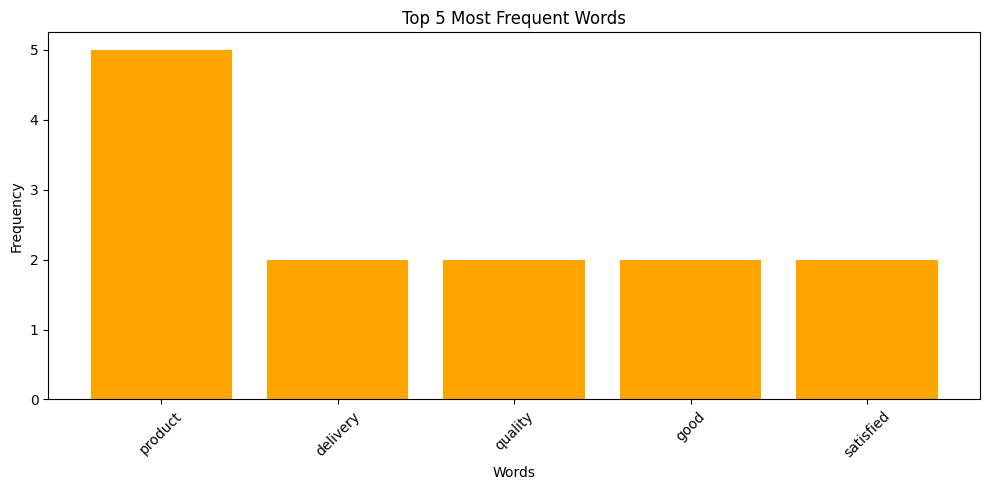

In [17]:
words = [w for w, f in top_N]
counts = [f for w, f in top_N]

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="orange")
plt.title(f"Top {N} Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()